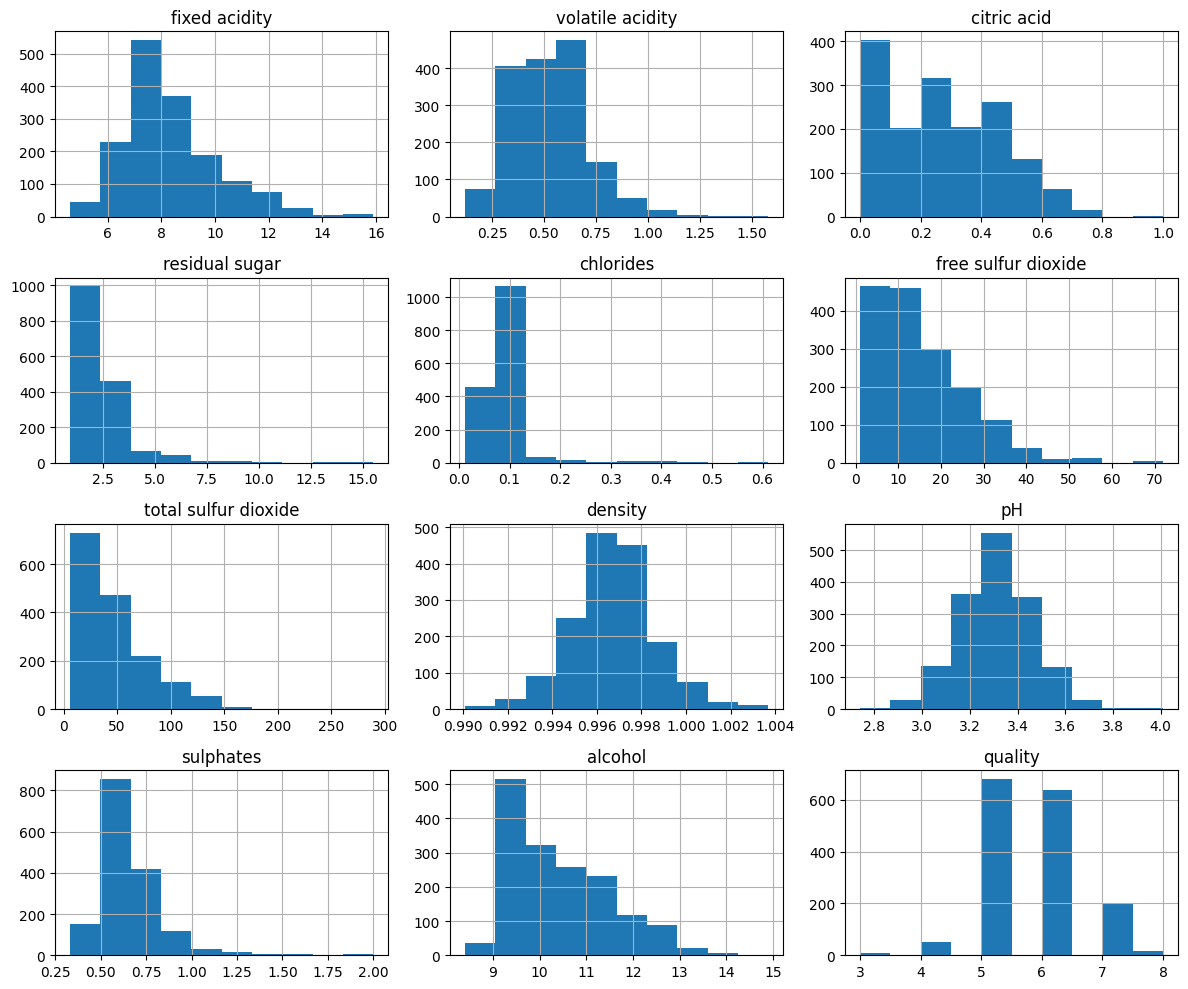

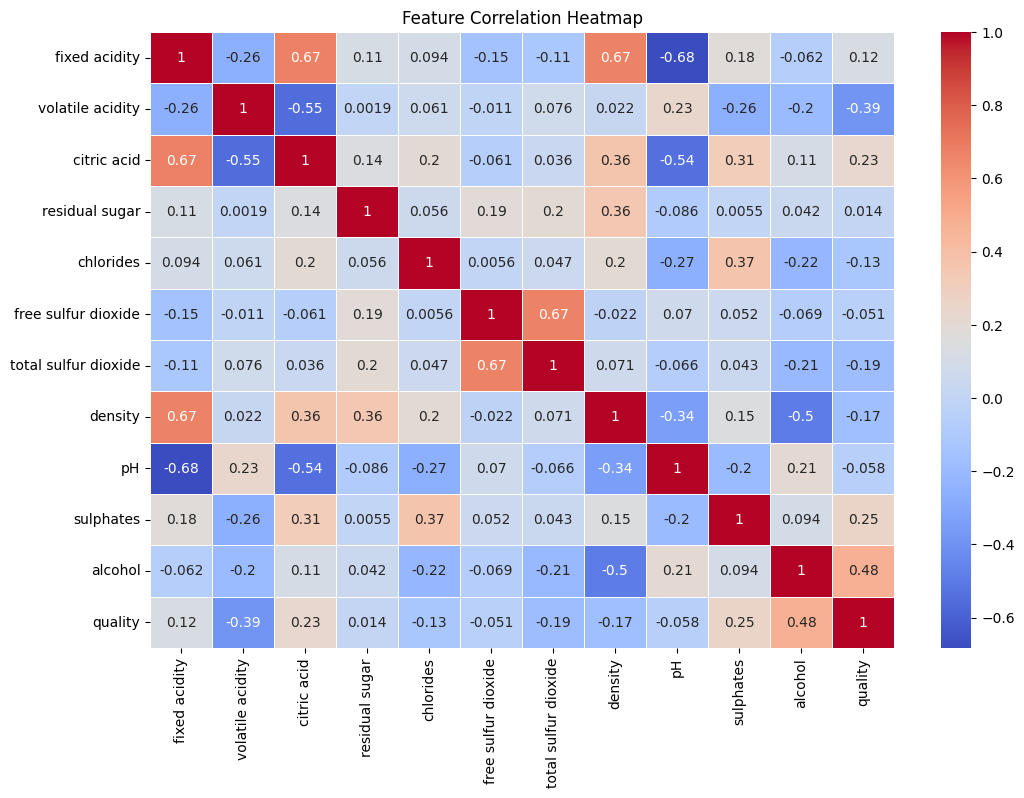

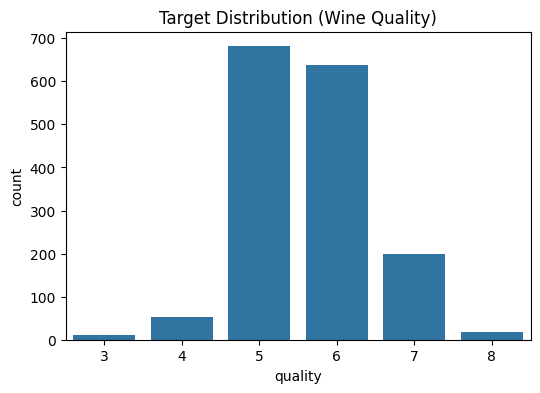

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Load the Wine Quality dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# --- Visualization: Before Training ---

# 1. Distribution of each feature (histograms)
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 2. Correlation heatmap between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. Distribution of target variable (Good vs Bad wine)
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df)
plt.title('Target Distribution (Wine Quality)')
plt.show()

In [2]:
# --- Preprocessing and Training ---

# Separate features and target labels
X = df.drop('quality', axis=1)
y = df['quality']

# Convert the quality labels into binary classification: Good (>=7) and Bad (<7)
y = (y >= 7).astype(int)  # 1 for Good quality, 0 for Bad quality

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (SVM works better with standardized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True)

# Train the model
svm_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_rbf.predict(X_test)


Accuracy: 0.8812

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       413
           1       0.66      0.31      0.42        67

    accuracy                           0.88       480
   macro avg       0.78      0.64      0.68       480
weighted avg       0.86      0.88      0.86       480



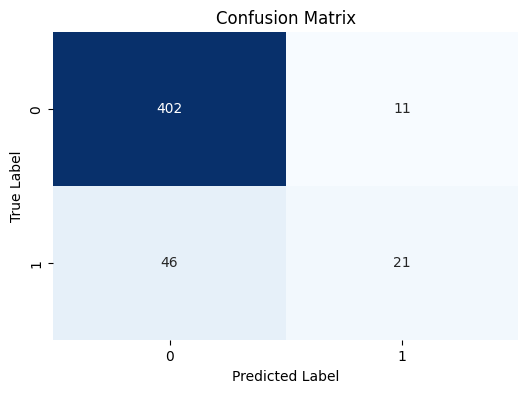

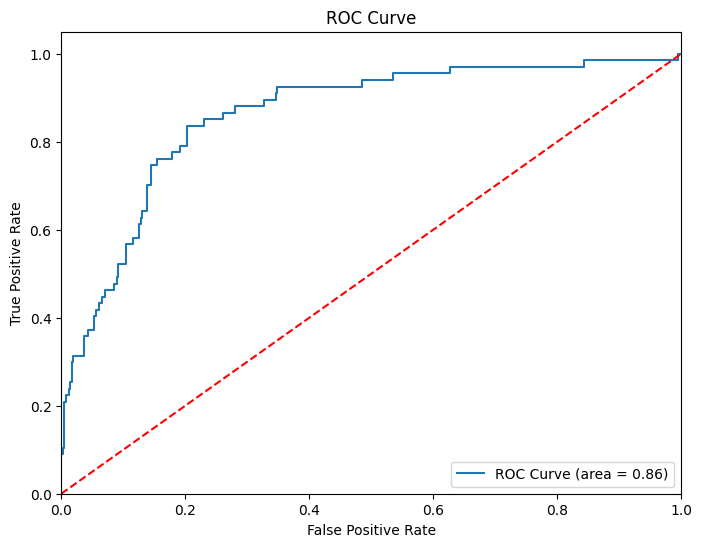

In [3]:
# --- Evaluation: After Training ---

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 5. ROC Curve
y_prob = svm_rbf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (chance line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01,

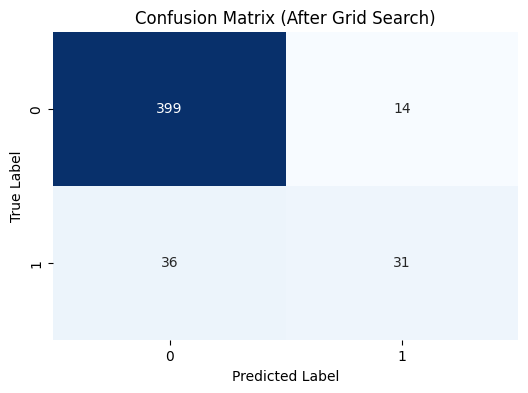

In [4]:
# --- Grid Search for Hyperparameter Tuning ---

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}

# Perform grid search
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid.best_params_)

# Evaluate on the test set
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6. Replot Confusion Matrix for the Grid Search Model
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (After Grid Search)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()